
<h1 style = 'text-align:center'>MIDTERM EXAM PROJECT<br>CHICAGO CRIMES DATA ANALYTICS PROJECT <br>RESTRUCTURED DATA (2024 - 2025 ONLY)</h1>
<hr>
<h4 style = 'color:gray'>ANALYST - LOUIEZZY RAMOS </h4> <hr> <hr>

<h1 style="text-align:center; color:blue;">PROJECT SUMMARY</h1>

<h4 style="color:gray;">
    I. Total Crimes: 2024 vs 2025 <br> <br>
    II. Year 2024  
    <br>&nbsp;&nbsp;&nbsp; a. Monthly Crime Numbers <br>
    &nbsp;&nbsp;&nbsp; b. Crime List  <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -Top 10 Types of Crimes <br> 
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -10 Least Common Types of Crimes <br> <br>
    IV. Arrest Rate by Year
    <br>&nbsp;&nbsp;&nbsp; a.Top 15 Crime Types by Arrest Rate <br> <br>
    V. Crime Distribution by District (2024 - 2025)
    <br>&nbsp;&nbsp;&nbsp; a. Top 5 Crimes in District 8 (Chicago Lawn)
    <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -District 8 – Chicago Lawn <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -Theft Incident (Arrested or Not) <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -Battery Incident (Arrested or Not) <br> <br>
    VI. Domestic-Related Incidents: 2024 vs 2025 
    <br>&nbsp;&nbsp;&nbsp; a. Top Districts with the Most Domestic-Related Incidents <br> <br>
    VII. Locations Descriptions with the Most Reported Incidents <br>  <br>
    VIII. GEOMAPS
    <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -Weapon Violation <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -Criminal Sexual Assault <br>
    <br>
    IX. Common Crime Descriptions in Chicago<br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -Arrest Outcomes for 'SIMPLE' Crime Descriptions <br>
    &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; -Arrest Outcomes for 'DOMESTIC BATTERY SIMPLE' Crime Descriptions <br>
    
    
    
</h4>

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>DATABASE - RESTRUCTURED DATA (2024 - 2025 ONLY) <h1>
<hr>

In [2]:
cf = pd.read_csv("datasets//Chicago_Crimes.csv")

In [3]:
cf.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


<h1>FILLING UP NULL VALUES</h1>
<hr>

<h1>Main set of null values:</h1>

In [4]:
cf.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h3 style = 'color:gray'>There are 7 columns to fill up; [Location Description, Community Area, X Coordinate, Y Coordinate, Latitude, Longitude, Location] Now, we're going to fill up the null values using the code below. </h3>

In [5]:
cf ['Location Description'] =  cf['Location Description'].fillna(cf['Location Description'].mode()[0])
cf ['Community Area'] =  cf['Community Area'].fillna(cf['Community Area'].mode()[0])
cf ['X Coordinate'] =  cf['X Coordinate'].fillna(cf['X Coordinate'].mode()[0])
cf ['Y Coordinate'] =  cf['Y Coordinate'].fillna(cf['Y Coordinate'].mode()[0])
cf ['Latitude'] =  cf['Latitude'].fillna(cf['Latitude'].mode()[0])
cf ['Longitude'] =  cf['Longitude'].fillna(cf['Longitude'].mode()[0])
cf ['Location'] =  cf['Location'].fillna(cf['Location'].mode()[0])
cf.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1>CHECK DATA TYPES ---> Then CHANGE DATA TYPES </h1>
<hr>

In [6]:
cf.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
cf ['Case Number'] = cf['Case Number'].astype('category')
cf ['Date'] = cf['Date'].astype('str')
cf ['Block'] = cf['Block'].astype('category')
cf ['IUCR'] = cf['IUCR'].astype('category')
cf ['Primary Type'] = cf['Primary Type'].astype('category')
cf ['Description'] = cf['Description'].astype('category')
cf ['Location Description'] = cf['Location Description'].astype('category')
cf ['FBI Code'] = cf['FBI Code'].astype('category')
cf ['Updated On'] = cf['Updated On'].astype('category')
cf ['Location'] = cf['Location'].astype('category')
cf.dtypes

ID                         int64
Case Number             category
Date                      object
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area           float64
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On              category
Latitude                 float64
Longitude                float64
Location                category
dtype: object

In [8]:
cf.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [9]:
cf['Date'] = cf['Date'].str.strip()

cf['Date'] = cf['Date'].astype('str')

cf['Date'] = cf['Date'].str.replace('/', '-')

cf['Date'] = pd.to_datetime(cf['Date'], dayfirst = True, errors = 'coerce')

In [10]:
cf.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                    category
Latitude                       float64
Longitude                      float64
Location                      category
dtype: object

In [11]:
cf['Date'] = pd.to_datetime(cf['Date'], dayfirst=True, errors='coerce')

cf['Year'] =  cf['Date'].dt.year
cf['Month'] =  cf['Date'].dt.month
cf['Day'] =  cf['Date'].dt.day
cf['DayOfWeek'] =  cf['Date'].dt.dayofweek


In [12]:
cf.describe()

,ID,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,DayOfWeek
count,2.491230e+05,249123,249123.000000,249123.000000,249123.000000,249123.000000,2.491230e+05,2.491230e+05,249123.000000,249123.000000,249123.000000,249123.000000,249123.000000,249123.000000
mean,1.358652e+07,2024-09-29 02:28:42.947460352,1153.845634,11.308924,23.186823,36.238424,1.165313e+06,1.887590e+06,2024.241668,41.847129,-87.668871,6.536936,15.820001,2.993971
min,2.807300e+04,2024-01-05 00:00:00,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567,1.000000,1.000000,0.000000
25%,1.352322e+07,2024-06-13 01:36:30,533.000000,5.000000,10.000000,22.000000,1.153987e+06,1.860533e+06,2024.000000,41.772686,-87.710096,4.000000,8.000000,1.000000
50%,1.361560e+07,2024-09-16 11:19:00,1034.000000,10.000000,23.000000,32.000000,1.167193e+06,1.894259e+06,2024.000000,41.865584,-87.661716,7.000000,16.000000,3.000000
75%,1.370865e+07,2024-12-28 18:20:00,1732.000000,17.000000,34.000000,53.000000,1.176659e+06,1.910282e+06,2024.000000,41.909691,-87.627241,9.000000,23.000000,5.000000
max,1.381045e+07,2025-12-04 00:00:00,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531,12.000000,31.000000,6.000000
std,6.473192e+05,NaN,707.959752,7.074807,13.925951,21.567390,1.616658e+04,3.146368e+04,0.428095,0.086519,0.058880,3.362766,8.707056,1.998897


 <br> <br>
<hr> 
<hr> <h1 style="text-align:center; color:blue;">I. Total Crimes: 2024 vs 2025</h1>


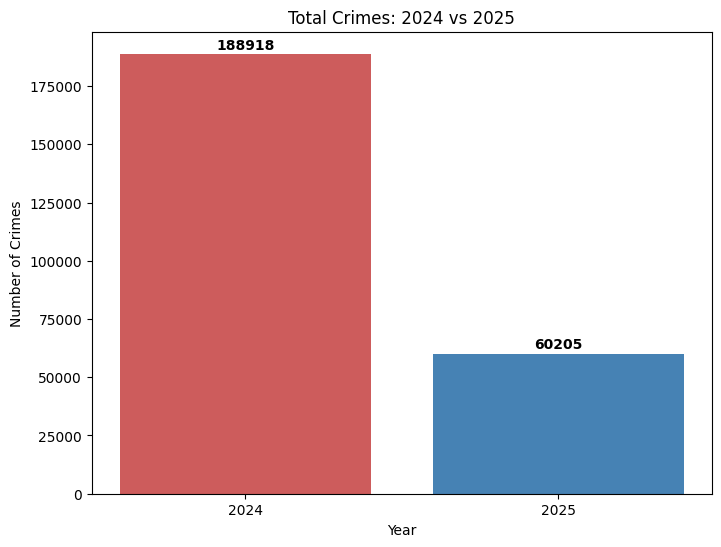

In [13]:
crime_2024 = cf[cf["Year"] == 2024].shape[0]
crime_2025 = cf[cf["Year"] == 2025].shape[0]

# Prepare data for bar chart
crime_counts = [crime_2024, crime_2025]
labels = ["2024", "2025"]

# Plot bar chart
plt.bar(labels, crime_counts, color=["indianred", "steelblue"])
plt.gcf().set_size_inches(8, 6)
plt.title("Total Crimes: 2024 vs 2025")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")

for i, v in enumerate(crime_counts):
    plt.text(i, v + 2000, str(v), ha='center', fontweight='bold')

plt.show()

<h3 style="color:gray">INSIGHT 1: In 2024, a notably high number of crimes were recorded (188,918 cases, accounting for about 76% of the total), which was significantly greater than the following year. This may point to either more comprehensive reporting in 2024 or an actual increase in criminal activity.</h3>


<h3 style="color:gray">
    INSIGHT 2: Since 2025 is still in progress, the dataset may not yet cover all months, with 60,205 crimes (about 24% of total cases so far). This makes the yearly total appear smaller compared to 2024. Reported crimes in 2025 are roughly 68% lower than in 2024, a drop that could indicate either improved law enforcement efforts or incomplete data for the year.</h3>


<h3 style="color:gray">
    INSIGHT 3: According to the database, Chicago recorded a combined total of 249,123 crimes across 2024 and 2025. Of this, 2024 accounted for the majority with 188,918 cases (76%), while 2025 has reported 60,205 cases so far (24%). The sharp decline in 2025 may reflect either ongoing improvements in crime prevention </h3>

<hr><hr>
<h1 style="text-align:center; color:blue;">II. Year 2024</h1>
<h2>
    a. Monthly Crime Numbers in 2024 <br>
</h2>

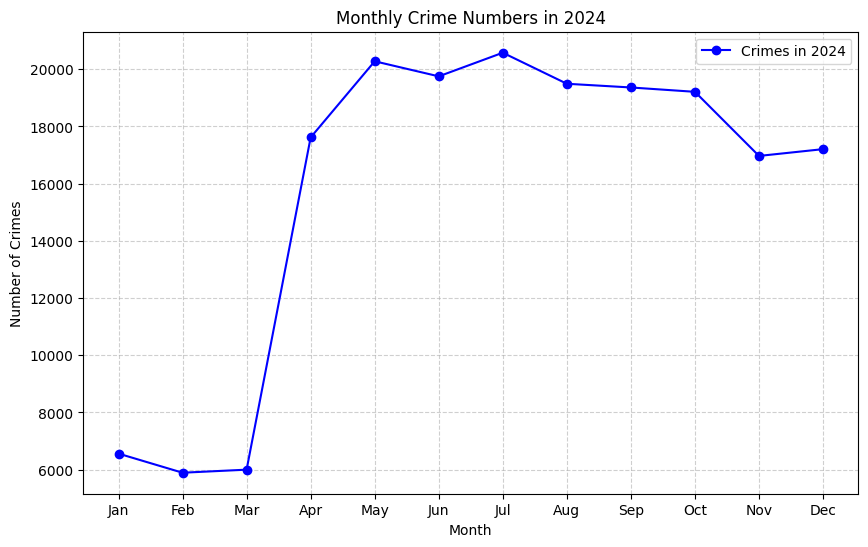

In [14]:

cf["Date"] = pd.to_datetime(cf["Date"], errors="coerce")

#Get 2024 result only! 
cf_2024 = cf[cf["Year"] == 2024]


monthly_2024 = cf_2024.groupby(cf_2024["Date"].dt.month).size()


plt.figure(figsize=(10,6))
plt.plot(monthly_2024.index, monthly_2024.values, marker='o', linestyle='-', color='blue', label="Crimes in 2024")


plt.title("Monthly Crime Numbers in 2024")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")


plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<h3 style="color:gray">INSIGHT 3 - OVERALL
    : From January to March, there was minimal crime (about 6,000 each month), but in April, there was an abrupt rise to over 17,000, which was almost three times as much as in the previous months.  Seasonal variations or changes in reporting procedures may be the cause of this spike. </h3>
<hr> 

<h3 style="color:gray">INSIGHT 5 - SUMMER PEAK: While activity was constantly high from May to July, crime peaked in July with over 20,000 (about 10.6%) incidents, confirming research showing that crime tends to rise in the summer months due to an increase in outside activity and social engagement. </h3>
<hr> 

<hr>
<h2>
    b. Crime List in 2024 <br>
</h2>

In [15]:
crime_list = cf['Primary Type'].unique()


crime_list_sorted = sorted(crime_list)


for crime in crime_list_sorted:
    print(crime)

ARSON
ASSAULT
BATTERY
BURGLARY
CONCEALED CARRY LICENSE VIOLATION
CRIMINAL DAMAGE
CRIMINAL SEXUAL ASSAULT
CRIMINAL TRESPASS
DECEPTIVE PRACTICE
GAMBLING
HOMICIDE
HUMAN TRAFFICKING
INTERFERENCE WITH PUBLIC OFFICER
INTIMIDATION
KIDNAPPING
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
NARCOTICS
NON-CRIMINAL
OBSCENITY
OFFENSE INVOLVING CHILDREN
OTHER NARCOTIC VIOLATION
OTHER OFFENSE
PROSTITUTION
PUBLIC INDECENCY
PUBLIC PEACE VIOLATION
ROBBERY
SEX OFFENSE
STALKING
THEFT
WEAPONS VIOLATION


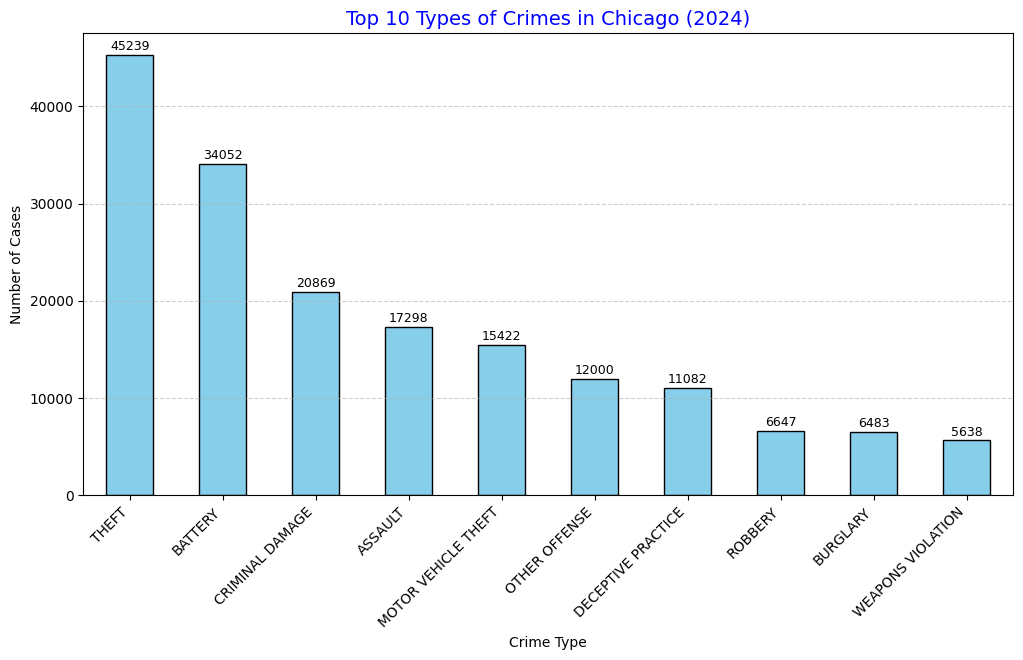

In [16]:
#Get 2024 result only! 
cf_2024 = cf[cf['Year'] == 2024]


crime_types_2024 = cf_2024['Primary Type'].value_counts()

#NOTE: If you want to know the "most" number, use the ".head()" --> crime_types_2024.head(10)
plt.figure(figsize=(12,6))
crime_types_2024.head(10).plot(kind='bar', color='skyblue', edgecolor='black')


plt.title("Top 10 Types of Crimes in Chicago (2024)", fontsize=14, color="blue")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.6)


for i, value in enumerate(crime_types_2024.head(10).values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=9)

plt.show()

<h3 style="color:gray">
    INSIGHT 6 - THEFT DOMINATION: With 45,239 occurrences reported, theft is clearly the most common crime in Chicago in 2024.  It represents nearly all of all cases, reflecting the city's constant property crime issue, which is frequently connected to financial difficulties.
</h3>

<h3 style="color:gray">
    INSIGHT 7 - PHYSICAL VIOLENCE: Chicago has always suffered with high violent crime rates, which usually occur in specific neighborhoods.  In total, assault (17,298 attacks) and battery (34,052 cases) totaled over 50,000 incidents in 2024.  These numbers highlight persistent problems with interpersonal violence.
</h3>
<hr>


<h2 style="color:blue">
   - - GEOMAP - -

</h2>
<h3 style="color:gray">
     &nbsp;&nbsp;&nbsp;THEFT DOMINATION
</h3>

In [17]:
theft_2024 = cf_2024[(cf_2024['Year'] == 2024) & (cf_2024['Primary Type'] == "THEFT")]


theft_df = theft_2024.groupby(['Longitude', 'Latitude']).size().reset_index(name='incident_count')


theft_df['normalized_weight'] = (theft_df['incident_count'] - theft_df['incident_count'].min()) / \
                                (theft_df['incident_count'].max() - theft_df['incident_count'].min())


theft_list = theft_df[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()


theft_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)


HeatMap(theft_list, radius=10, blur=15, max_zoom=13).add_to(theft_map)

theft_map.save('theft_2024_heatmap.html')

theft_map

<h3 style="color:gray">
    INSIGHT 8: The map above reveals hotspots where theft incidents cluster. The central part of Chicago (Loop area) glows the hottest, it reflects increased theft risk in business and tourist-heavy areas.
</h3>

<hr> 
<h3 style="color:blue">Since we got to know about the TOP 10 TYPES OF CRIME IN CHICAGO (2024) 
    <br> <br>Here's the 10 LEAST COMMON TYPE OF CRIMES IN CHICAGO (2024)</h3>

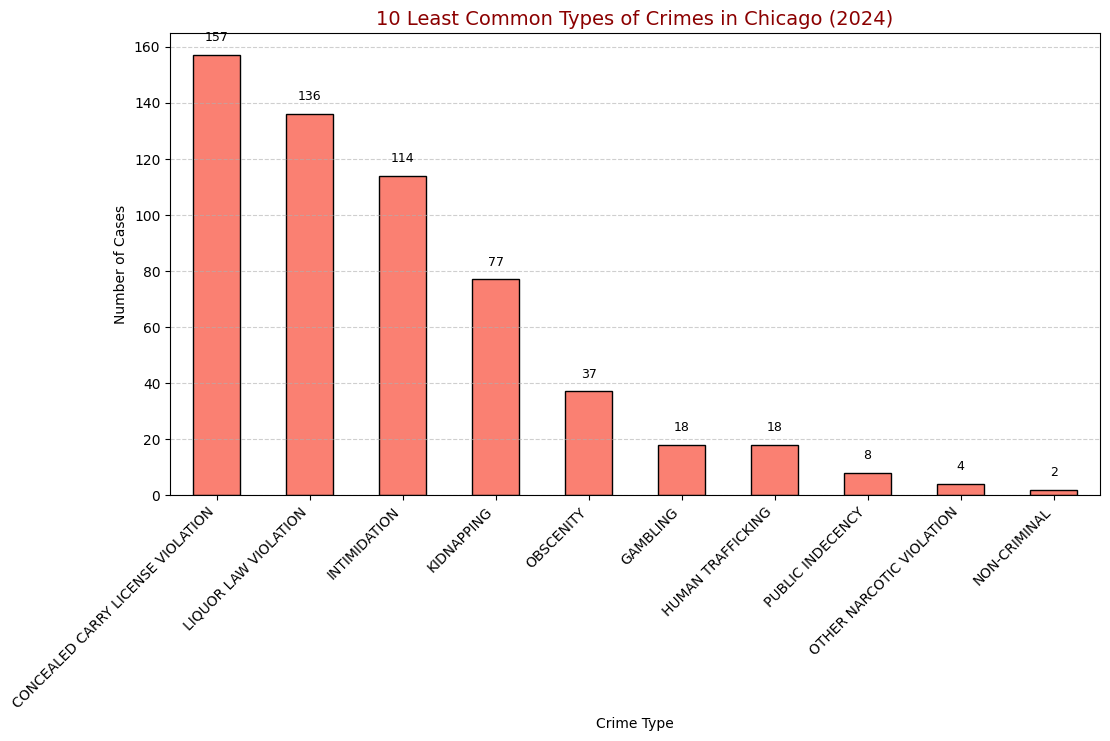

In [18]:
# Get 2024 result only
cf_2024 = cf[cf['Year'] == 2024]


crime_types_2024 = cf_2024['Primary Type'].value_counts()

#NOTE: If you want to know the "least" number, use the ".tail()" --> crime_types_2024.tail(10)
plt.figure(figsize=(12,6))
crime_types_2024.tail(10).plot(kind='bar', color='salmon', edgecolor='black')

plt.title("10 Least Common Types of Crimes in Chicago (2024)", fontsize=14, color="darkred")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.6)

for i, value in enumerate(crime_types_2024.tail(10).values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=9)

plt.show()

<h3 style="color:gray">
    INSIGHT 9 - NON-CRIMINAL: In Chicago's 2024 statistics, "Non-Criminal" cases are almost minor, with only 2 instances documented.  This implies that nearly all of the reports that law enforcement handles are related to specific criminal offenses, with extremely few instances being recorded but not being considered crimes.
</h3>

<h3 style="color:gray">
    INSIGHT 10: Liquor-Law Violations (136 instances), Concealed Carry License Violations (157 cases), and Obscenity (37 cases) were among the top 10 least common.  Compared to violent crimes, these offenses are more related to social behavior and regulatory issues, suggesting that enforcement in these areas is probably more selective and situational.
</h3>
<hr>

<h2 style="color:blue">
   - - GEOMAP - -

</h2>
<h3 style="color:gray">
     &nbsp;&nbsp;&nbsp;CONCEALED CARRY LICENSE VIOLATION
</h3>

In [19]:
cclv_2024 = cf_2024[(cf_2024['Year'] == 2024) & 
                    (cf_2024['Primary Type'] == "CONCEALED CARRY LICENSE VIOLATION")]

# Group by coordinates and count incidents
cclv_df = cclv_2024.groupby(['Longitude', 'Latitude']).size().reset_index(name='incident_count')

# Normalize the weights for heatmap intensity
cclv_df['normalized_weight'] = (cclv_df['incident_count'] - cclv_df['incident_count'].min()) / \
                               (cclv_df['incident_count'].max() - cclv_df['incident_count'].min())

# Convert to list of [Latitude, Longitude, Weight]
cclv_list = cclv_df[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

# Create the base map centered on Chicago
cclv_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add the heatmap layer
HeatMap(cclv_list, radius=10, blur=15, max_zoom=13).add_to(cclv_map)

# Save and display the map
cclv_map.save('cclv_2024_heatmap.html')

cclv_map

<h3 style="color:gray">
    INSIGHT 11: This implies that concealed carry offenses are more common in areas with a high population or substantial amount of travel, possibly close to tourist places, transit hubs where there is a greater presence of law enforcement.
</h3>

<hr><hr>
<h1 style="text-align:center; color:blue;">III. Year 2025</h1>

<h2>
    a. Monthly Crime Numbers in 2025 <br>
</h2>

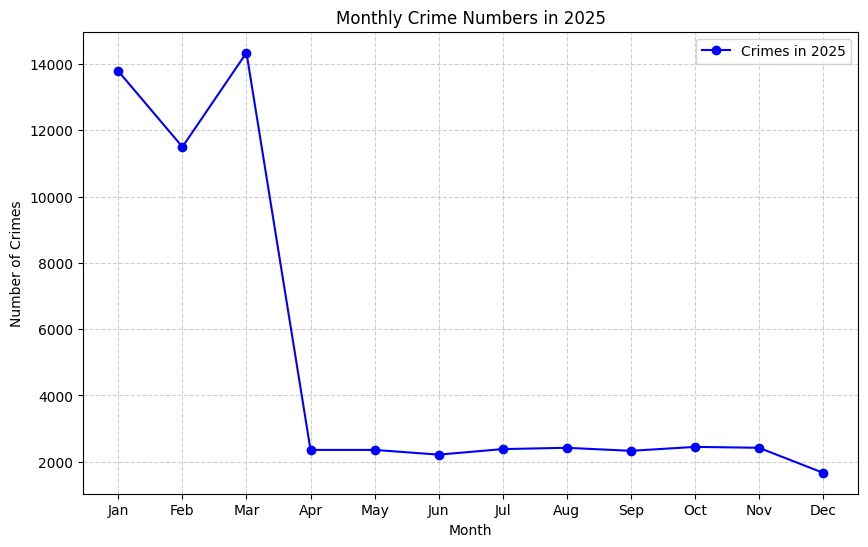

In [20]:


cf["Date"] = pd.to_datetime(cf["Date"], errors="coerce")

cf_2025 = cf[cf["Year"] == 2025]

monthly_2025 = cf_2025.groupby(cf_2025["Date"].dt.month).size()


plt.figure(figsize=(10,6))
plt.plot(monthly_2025.index, monthly_2025.values, marker='o', linestyle='-', color='blue', label="Crimes in 2025")

plt.title("Monthly Crime Numbers in 2025")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")

plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<h3 style="color:gray">
    INSIGHT 12: An exceptionally high concentration of crimes is seen in the first three months, particularly in March, when over 14,000 events were reported.
</h3>

<h3 style="color:gray">
    INSIGHT 13 - 2024 vs 2025: In contrast to 2024, when crime activity rapidly climbed from March to July, the average monthly crime rate in 2025 is 70–80% lower.  The exact reverse happened in 2025, though, when the number of crimes fell to less than 2,500 every month after March.
</h3>

In [21]:
cf.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

<hr><hr>
<h1 style="text-align:center; color:blue;">IV. Arrest Rate by Year</h1>

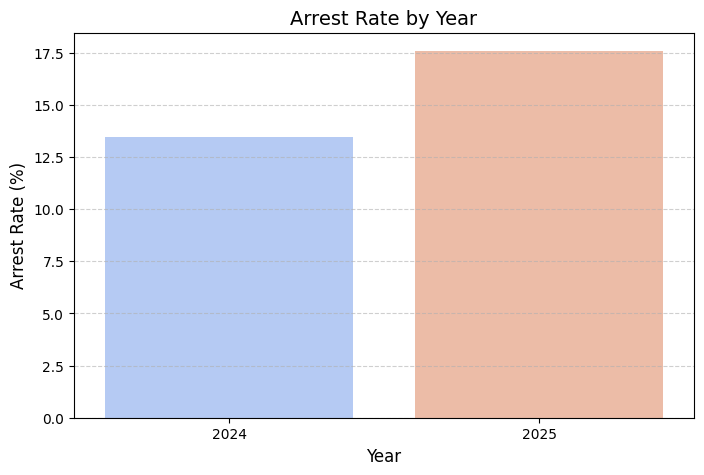

In [22]:
# Ensure Date and Year columns exist
cf['Date'] = pd.to_datetime(cf['Date'], errors='coerce')
cf['Year'] = cf['Date'].dt.year

# Arrest counts grouped by year
arrest_by_year = cf.groupby('Year')['Arrest'].mean().reset_index()
arrest_by_year['Arrest'] = arrest_by_year['Arrest'] * 100  # convert to percentage

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=arrest_by_year, x='Year', y='Arrest', palette='coolwarm')
plt.title("Arrest Rate by Year", fontsize=14)
plt.ylabel("Arrest Rate (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h3 style="color:gray">
    INSIGHT 14: According to the graph above, about 13–14% of reported offenses resulted in an arrest in 2024, compared to roughly 17–18% in 2025.
 This suggests that enforcement effectiveness has improved by about 30%, meaning that in 2025, police were more likely to make arrests in response to recorded offenses.
</h3>

<h2>
    a. Top 15 Crime Types by Arrest Rate<br>
</h2>

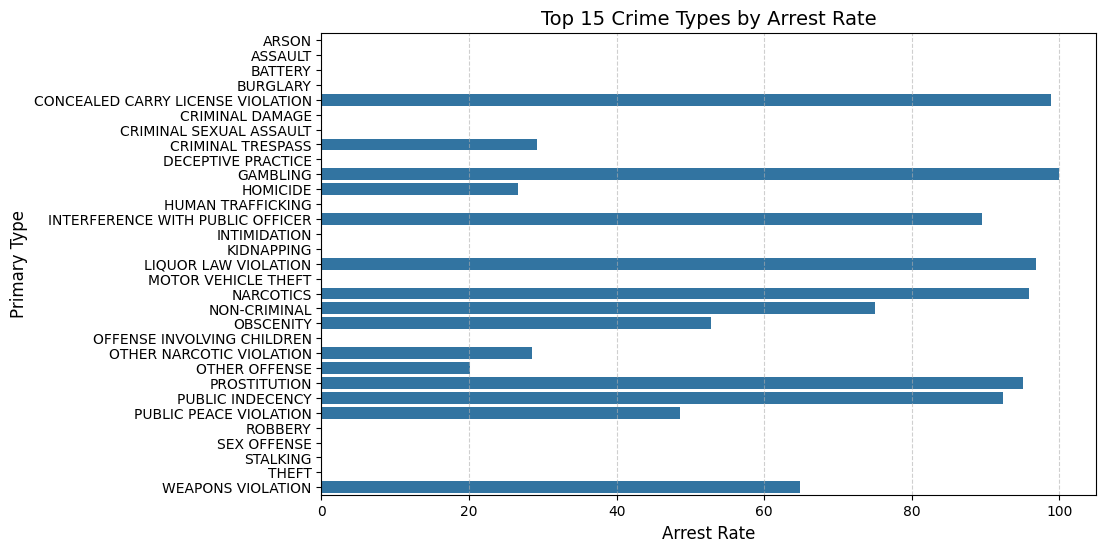

In [23]:
arrest_rate_by_type = cf.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=arrest_rate_by_type.values * 100, y=arrest_rate_by_type.index)
plt.title("Top 15 Crime Types by Arrest Rate", fontsize=14)
plt.xlabel("Arrest Rate", fontsize=12)
plt.ylabel("Primary Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<h3 style="color:gray">
    INSIGHT 15 : Arrest rates for crimes including homicide, intimidation, weapons violations, and concealed carry license violations are almost 100%, showing that law enforcement prioritizes dealing with dangerous and serious situations that endanger public safety.  These kinds of crimes are usually simpler to verify and frequently include circumstances in which law enforcement can react and make an arrest very away.
</h3>

<h3 style="color:gray">
    INSIGHT 16: With arrest rates between 20% and 50%, crimes including theft, deceptive practice (fraud), and criminal trespass have far lower rates.  There is a need for better investigative techniques and resource allocation to improve case resolution in these locations because these offenses are frequently reported later an incident, lack sufficient proof, or involve unidentified individuals.
</h3>

<hr><hr>
<h1 style="text-align:center; color:blue;">V. Crime Distribution by District</h1>

In [24]:
cf['District'].value_counts().sort_index()

District
1     14409
2     12848
3     12545
4     13318
5      9883
6     14157
7     10520
8     16691
9     10910
10    10133
11    13423
12    15355
14     9341
15     8605
16     8570
17     7801
18    13118
19    13640
20     5362
22     7710
24     8101
25    12664
31       19
Name: count, dtype: int64

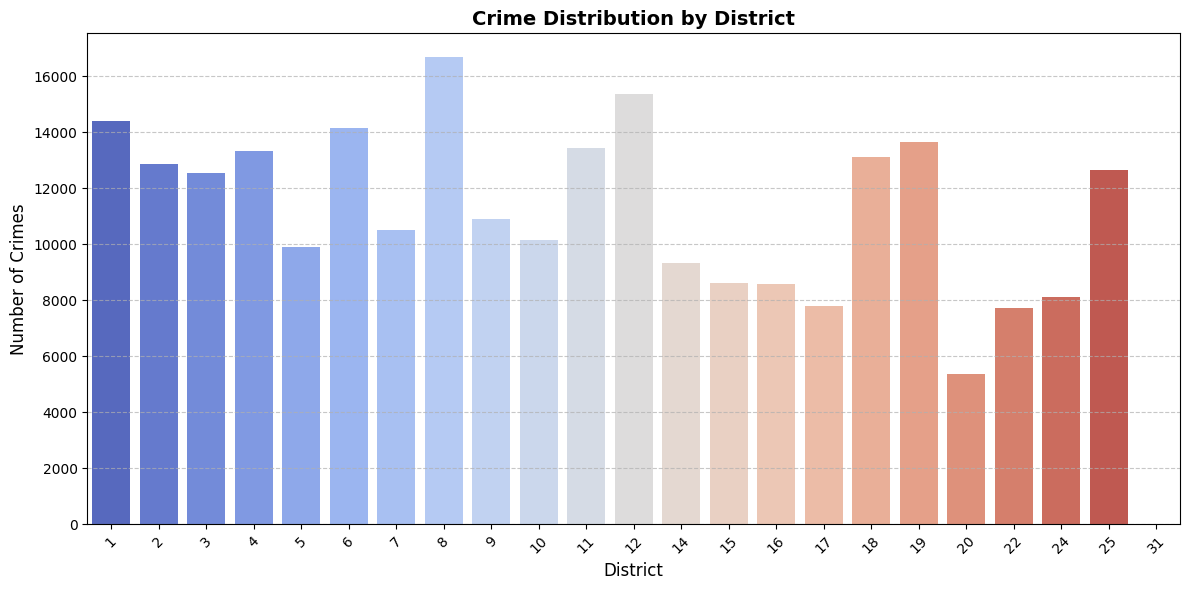

In [25]:
district_crime = cf.dropna(subset=['District'])

# Group by District and count the number of crimes
district_counts = district_crime['District'].value_counts().reset_index()
district_counts.columns = ['District', 'Crime_Count']

# Sort by district number
district_counts = district_counts.sort_values('District')

# Set up plot style
plt.figure(figsize=(12,6))
sns.barplot(data=district_counts, x='District', y='Crime_Count', palette='coolwarm')

# Add labels and title
plt.title("Crime Distribution by District", fontsize=14, weight='bold')
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

<h3 style="color:gray">
    INSIGHT 17:
</h3>

<ul>
    <li>District 8 – Chicago Lawn</li>
</ul>

<p>
    District 8 has the most crimes (about 16,691), which is far higher than the citywide average. 
    This indicates that Chicago Lawn faces ongoing crime challenges, likely linked to its 
    large residential population and close proximity to major transportation routes, 
    which can increase both crime opportunities and policing complexity.
</p>


<h3 style="color:gray">
    INSIGHT 18:
</h3>

<ul>
    <li>District 17 – Albany Park</li>
    <li>District 20 – Lincoln</li>
</ul>

<p>
    These districts report the lowest crime volumes among all areas. 
    District 20 recorded only 5,362 offenses, while District 17 remained below 8,000 crimes. 
    Their relatively low crime rates may be attributed to being primarily residential zones with quieter environments, 
    limited commercial activity, and lower population density. 
    This suggests that community stability and residential zoning play key roles in reducing crime prevalence.
</p>


<h3 style="color:gray">
    INSIGHT 19:
</h3>

<ul>
    <li>District 1 – Central (Downtown)</li>
    <li>District 6 – Gresham</li>
    <li>District 11 – Harrison</li>
    <li>District 12 – Near West</li>
    <li>District 18 – Near North</li>
    <li>District 19 – Town Hall</li>
</ul>

<p>
    These districts all report between 13,000–15,000 crimes each. 
    This trend suggests that both central business zones and densely populated residential areas 
    experience consistent levels of criminal activity — likely influenced by 
    high population density, active nightlife, and economic activity 
    that attract both offenders and potential victims.
</p>


<h2 style="color:blue">
   - - GEOMAP - -

</h2>
<h3 style="color:gray">
     &nbsp;&nbsp;&nbsp;District 8 – Chicago Lawn - has the most crimes (16,691).
</h3>

In [26]:

district8_2024 = cf[(cf['Year'] == 2024) & (cf['District'] == 8)]

district8_2024_df = district8_2024.groupby(['Longitude', 'Latitude']).size().reset_index(name='incident_count')
district8_2024_df['normalized_weight'] = (district8_2024_df['incident_count'] - district8_2024_df['incident_count'].min()) / \
                                         (district8_2024_df['incident_count'].max() - district8_2024_df['incident_count'].min())
district8_2024_list = district8_2024_df[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

district8_2024_map = folium.Map(location=[41.775, -87.7], zoom_start=12)
HeatMap(district8_2024_list, radius=10, blur=15, max_zoom=13).add_to(district8_2024_map)
district8_2024_map.save('district8_2024_heatmap.html')



district8_2025 = cf[(cf['Year'] == 2025) & (cf['District'] == 8)]

district8_2025_df = district8_2025.groupby(['Longitude', 'Latitude']).size().reset_index(name='incident_count')
district8_2025_df['normalized_weight'] = (district8_2025_df['incident_count'] - district8_2025_df['incident_count'].min()) / \
                                         (district8_2025_df['incident_count'].max() - district8_2025_df['incident_count'].min())
district8_2025_list = district8_2025_df[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

district8_2025_map = folium.Map(location=[41.775, -87.7], zoom_start=12)
HeatMap(district8_2025_list, radius=10, blur=15, max_zoom=13).add_to(district8_2025_map)
district8_2025_map.save('district8_2025_heatmap.html')

district8_2025_map


<h3 style="color:gray">
    INSIGHT 20: The areas with the highest temperatures are found near major roadways and railroad tracks, such as Archer Heights, West Elsdon, and Gage Park. This implies that high-traffic regions and transportation corridors continue to be areas with a high crime rate.
</h3>

        Crime Type  Number of Incidents
0            THEFT                  831
1          BATTERY                  687
2  CRIMINAL DAMAGE                  497
3    OTHER OFFENSE                  401
4          ASSAULT                  365


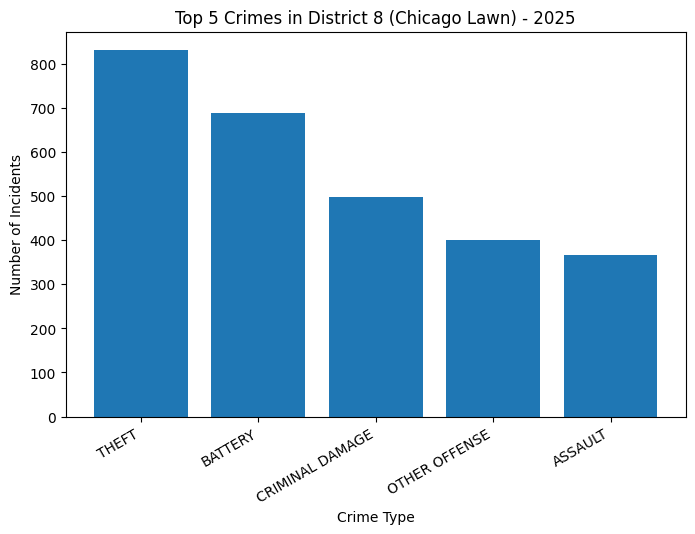

In [27]:
# Filter data for District 8
district8_data = cf_2025[cf_2025['District'] == 8]

# Count top 5 crimes by type
top5_crimes_d8 = (district8_data['Primary Type']
                  .value_counts()
                  .head(5)
                  .reset_index())
top5_crimes_d8.columns = ['Crime Type', 'Number of Incidents']

# Display the results
print(top5_crimes_d8)

# (Optional) Visualize as a bar chart
plt.figure(figsize=(8,5))
plt.bar(top5_crimes_d8['Crime Type'], top5_crimes_d8['Number of Incidents'])
plt.title('Top 5 Crimes in District 8 (Chicago Lawn) - 2025')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=30, ha='right')
plt.show()


<h3 style="color:gray">
    INSIGHT 21 - THEFT: Property-related offenses continue to be the most prevalent in Chicago Lawn, as evidenced by the 831 theft cases at the top of the list.  This points to persistent problems with shoplifting, burglaries, and small-time theft, which are frequently associated with crowded residential and commercial areas.
</h3>




<h3 style="color:gray">
    INSIGHT 22 - BATTERY: The district's high rate of violent or contentious interactions is reflected in the 687 battery instances that have been reported.  This emphasizes the necessity of better police in high-tension regions and community-based conflict avoidance.
</h3>



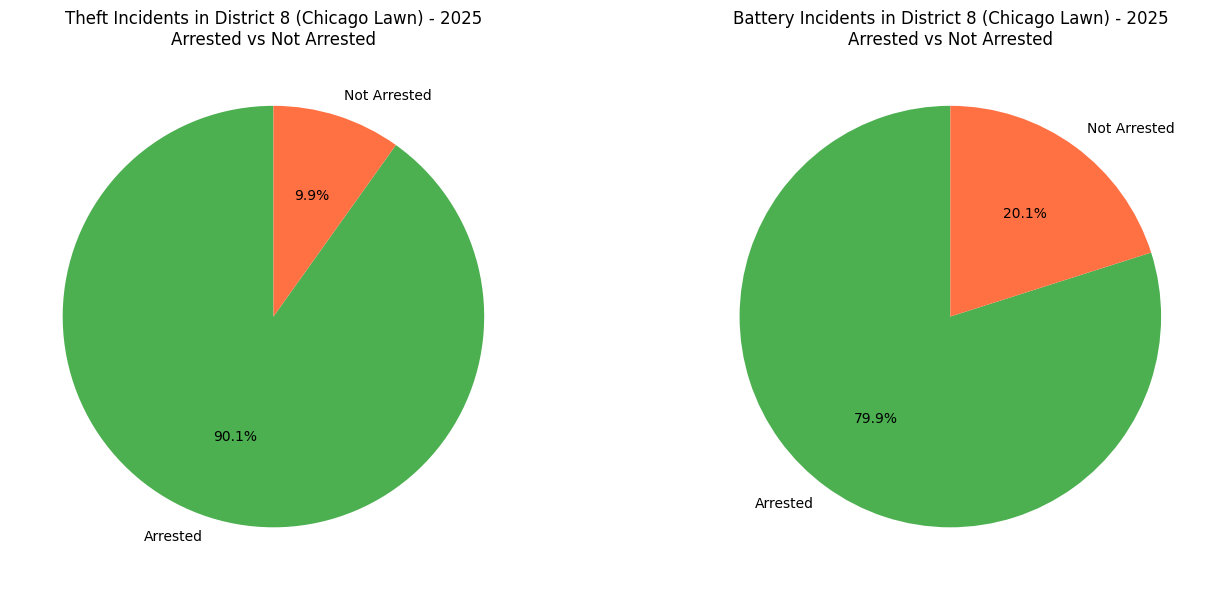

In [28]:


district8_theft = cf_2025[(cf_2025['District'] == 8) & 
                          (cf_2025['Primary Type'] == "THEFT")]

theft_counts = district8_theft['Arrest'].value_counts()
theft_labels = ['Arrested', 'Not Arrested']


battery_d8_2025 = cf_2025[(cf_2025['District'] == 8) & 
                          (cf_2025['Primary Type'] == "BATTERY")]

battery_counts = battery_d8_2025['Arrest'].value_counts()
battery_labels = ['Arrested', 'Not Arrested']


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].pie(
    theft_counts,
    labels=theft_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FF7043']
)
axes[0].set_title('Theft Incidents in District 8 (Chicago Lawn) - 2025\nArrested vs Not Arrested', fontsize=12)


axes[1].pie(
    battery_counts,
    labels=battery_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FF7043']
)
axes[1].set_title('Battery Incidents in District 8 (Chicago Lawn) - 2025\nArrested vs Not Arrested', fontsize=12)


plt.tight_layout()
plt.show()


<h3 style="color:gray">
    INSIGHT 23 - THEFT: About 90% of theft cases ended without an arrest, indicating serious resource or investigation limitations in the district's efforts to prevent property crimes.  In District 8, arrests were made in only about 9.9% of theft-related events.
</h3>




<h3 style="color:gray">
    INSIGHT 24 - BATTERY: In District 8, the majority of battery incidents result in arrests, demonstrating a prompt and efficient law enforcement response.  In contrast to property-related crimes like theft, where criminals are more difficult to identify or apprehend in the act, police are frequently able to react swiftly and apprehend suspects since these cases typically include in-person confrontations or direct witnesses.
</h3>



<hr><hr>
<h1 style="text-align:center; color:blue;">VI. Domestic-Related Incidents: 2024 vs 2025</h1>

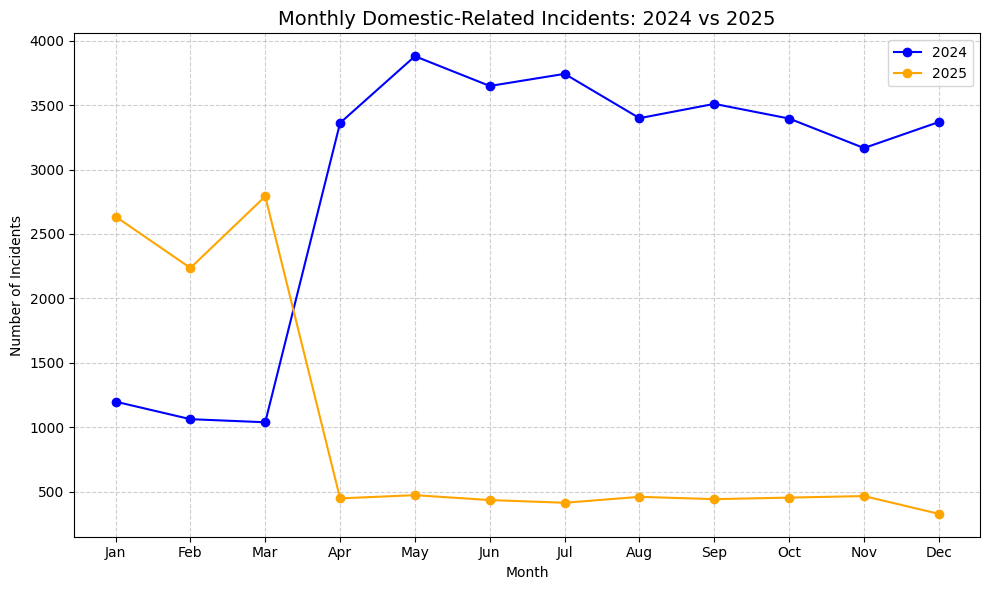

In [29]:
domestic_2024 = cf[(cf['Year'] == 2024) & (cf['Domestic'] == True)]
domestic_2025 = cf[(cf['Year'] == 2025) & (cf['Domestic'] == True)]


monthly_domestic_2024 = domestic_2024.groupby(domestic_2024['Date'].dt.month).size()
monthly_domestic_2025 = domestic_2025.groupby(domestic_2025['Date'].dt.month).size()


plt.figure(figsize=(10,6))
plt.plot(monthly_domestic_2024.index, monthly_domestic_2024.values, 
         marker='o', linestyle='-', color='blue', label='2024')
plt.plot(monthly_domestic_2025.index, monthly_domestic_2025.values, 
         marker='o', linestyle='-', color='orange', label='2025')


plt.title("Monthly Domestic-Related Incidents: 2024 vs 2025", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


<h3 style="color:gray">
    INSIGHT 25: In comparison, 2024 exhibits continuously high domestic-related occurrences from April to December, with only little variations, whereas 2025 has a sharp drop in domestic-related incidents beginning in April..
</h3>
<hr>


In [30]:
cf.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

   District  Number of Domestic Incidents
0         6                          3915
1         4                          3463
2         8                          3388
3         3                          3321
4        11                          2911


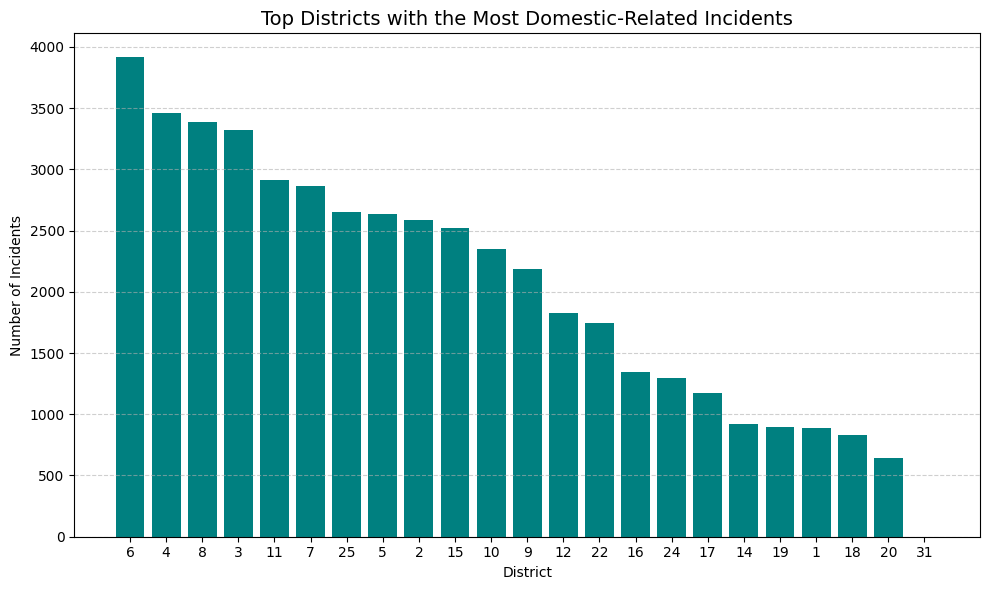

In [31]:
domestic_cases = cf[cf['Domestic'] == True]

# Count incidents by district
domestic_by_district = domestic_cases['District'].value_counts().reset_index()
domestic_by_district.columns = ['District', 'Number of Domestic Incidents']

# Display the top 5 districts
print(domestic_by_district.head(5))

# Optional: visualize with a bar chart
plt.figure(figsize=(10,6))
plt.bar(domestic_by_district['District'].astype(str), domestic_by_district['Number of Domestic Incidents'], color='teal')
plt.title("Top Districts with the Most Domestic-Related Incidents", fontsize=14)
plt.xlabel("District")
plt.ylabel("Number of Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h3 style="color:gray">
    INSIGHT 26: With the highest number of domestic-related events (3,915), District 6 (Gresham region) may be a major hotspot for family-related disruptions and domestic violence in Chicago.  This would suggest that local social or economic pressures are causing recurrent occurrences.
</h3>

<hr>

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'Month', 'Day', 'DayOfWeek']


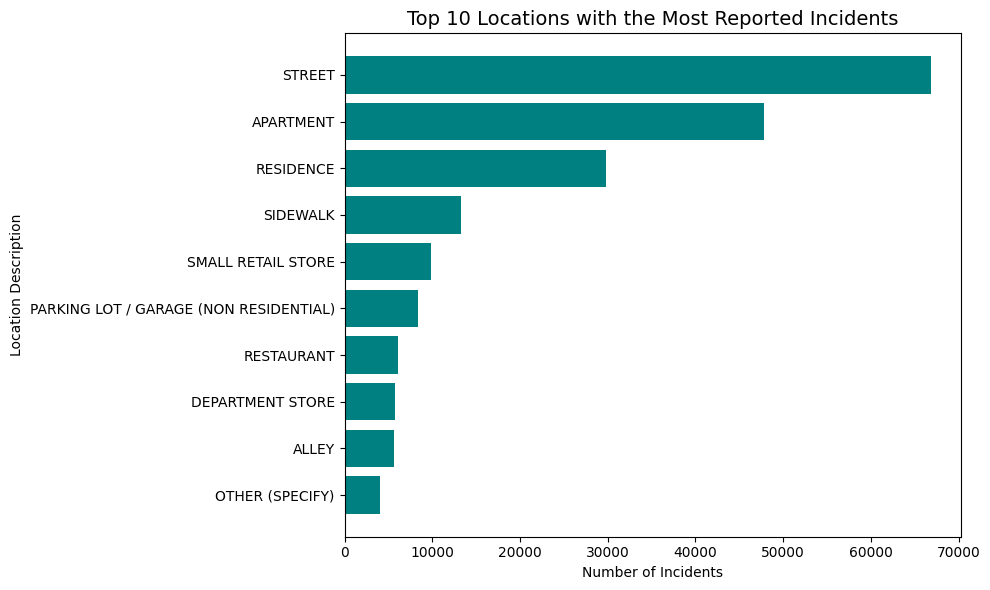

In [35]:

print(cf.columns.tolist())


location_counts = (
    cf['Location Description']
    .value_counts()
    .reset_index()
)
location_counts.columns = ['Location Description', 'Number of Incidents']


plt.figure(figsize=(10,6))
plt.barh(
    location_counts['Location Description'].head(10),
    location_counts['Number of Incidents'].head(10),
    color='teal'
)
plt.gca().invert_yaxis()  # Highest values on top
plt.title("Top 10 Locations with the Most Reported Incidents", fontsize=14)
plt.xlabel("Number of Incidents")
plt.ylabel("Location Description")
plt.tight_layout()
plt.show()


<h3 style="color:gray">
    INSIGHT 27: The main areas for crime are the streets. Streets are the most frequent site of crime, with about 70,000 occurrences reported.  This implies that open and public settings are more vulnerable. While apartments and residences rank second and third, together accounting for a significant portion of total incidents.
</h3>

<hr>

In [36]:
cf.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

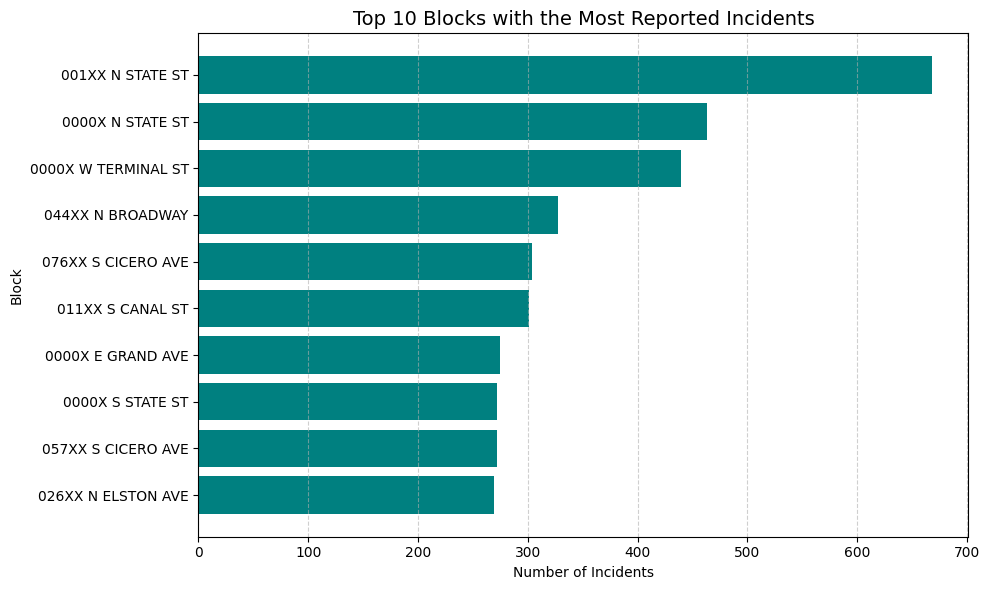

In [37]:
block_counts = cf['Block'].value_counts().reset_index()
block_counts.columns = ['Block', 'Number of Incidents']

# Select the top 10 most frequent blocks
top10_blocks = block_counts.head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top10_blocks['Block'], top10_blocks['Number of Incidents'], color='teal')
plt.gca().invert_yaxis()  # Highest on top

# Titles and labels
plt.title('Top 10 Blocks with the Most Reported Incidents', fontsize=14)
plt.xlabel('Number of Incidents')
plt.ylabel('Block')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

<h3 style="color:gray">
    INSIGHT 28: With almost 700 documented cases—far more than other locations—001XX N STATE ST, District 18 near North is the most incident-prone block.
</h3>
<hr>

<h2 style="color:blue">
   - - GEOMAPS - -

</h2>
<h3 style="color:gray">
     &nbsp;&nbsp;&nbsp;WEAPON VIOLATION <br>
</h3>

In [46]:
weapon_violation = cf[cf['Primary Type'] == "WEAPONS VIOLATION"]


total_weapon_violations = weapon_violation.shape[0]
print(f"Total number of weapon violation incidents: {total_weapon_violations}")


weapon_violation_df = weapon_violation.groupby(['Longitude', 'Latitude']).size().reset_index(name='incident_count')


weapon_violation_df['normalized_weight'] = (
    (weapon_violation_df['incident_count'] - weapon_violation_df['incident_count'].min()) /
    (weapon_violation_df['incident_count'].max() - weapon_violation_df['incident_count'].min())
)


weapon_violation_list = weapon_violation_df[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()


weapon_violation_map = folium.Map(location=[41.8781, -87.6298], zoom_start=8)


HeatMap(weapon_violation_list).add_to(weapon_violation_map)


weapon_violation_map.save('weapon_violation.html')
weapon_violation_map

Total number of weapon violation incidents: 7164



<h3 style="color:gray">
    INSIGHT 29: Total number of weapon violation incidents: 7164. The South Side of Chicago, especially the areas surrounding Englewood and South Shore, has the highest concentration of weapon infractions. Weapon-related crimes are largely an urban, high-density problem localized in particular districts, as evidenced by the moderate activity seen in the Downtown and North Side areas and the relatively low number of instances in the outlying suburbs.
</h3>
 <hr>

<h3 style="color:gray">
    &nbsp;&nbsp;&nbsp;CRIMINAL SEXUAL ASSAULT <br>
</h3>

In [48]:

criminal_sexual_assault = cf[cf['Primary Type'] == "CRIMINAL SEXUAL ASSAULT"]


total_criminal_sexual_assaults = criminal_sexual_assault.shape[0]
print(f"Total number of criminal sexual assault incidents: {total_criminal_sexual_assaults}")


criminal_sexual_assault_df = criminal_sexual_assault.groupby(['Longitude', 'Latitude']).size().reset_index(name='incident_count')


criminal_sexual_assault_df['normalized_weight'] = (
    (criminal_sexual_assault_df['incident_count'] - criminal_sexual_assault_df['incident_count'].min()) /
    (criminal_sexual_assault_df['incident_count'].max() - criminal_sexual_assault_df['incident_count'].min())
)


criminal_sexual_assault_list = criminal_sexual_assault_df[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()


criminal_sexual_assault_map = folium.Map(location=[41.8781, -87.6298], zoom_start=8)


HeatMap(criminal_sexual_assault_list).add_to(criminal_sexual_assault_map)


criminal_sexual_assault_map.save('criminal_sexual_assault.html')
criminal_sexual_assault_map

Total number of criminal sexual assault incidents: 1573



<h3 style="color:gray">
    INSIGHT 30: High-density clusters can be seen on the heatmap spreading southern into Hammond from Evanston through central Chicago.
Because this corridor passes through important urban and transit districts, it is possible that higher reporting or incidence rates are a result of factors like population density, nightlife, or transportation hubs.
</h3>

In [51]:
cf.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [55]:
cf['Description']

0                               FROM BUILDING
1                     HARASSMENT BY TELEPHONE
2               CYCLE, SCOOTER, BIKE WITH VIN
3               UNLAWFUL POSSESSION - HANDGUN
4                               FROM BUILDING
                         ...                 
249118         HARASSMENT BY ELECTRONIC MEANS
249119    AGGRAVATED - OTHER DANGEROUS WEAPON
249120                DOMESTIC BATTERY SIMPLE
249121    AGGRAVATED - OTHER DANGEROUS WEAPON
249122               THEFT FROM MOTOR VEHICLE
Name: Description, Length: 249123, dtype: category
Categories (318, object): ['$500 AND UNDER', 'ABUSE / NEGLECT - CARE FACILITY', 'AGG CRIM SEX ABUSE - VIC 13-16 YOA - OFF 5 YR..., 'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, S..., ..., 'VIOLENT OFFENDER - ANNUAL REGISTRATION', 'VIOLENT OFFENDER - DUTY TO REGISTER', 'VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS', 'WIC FRAUD']

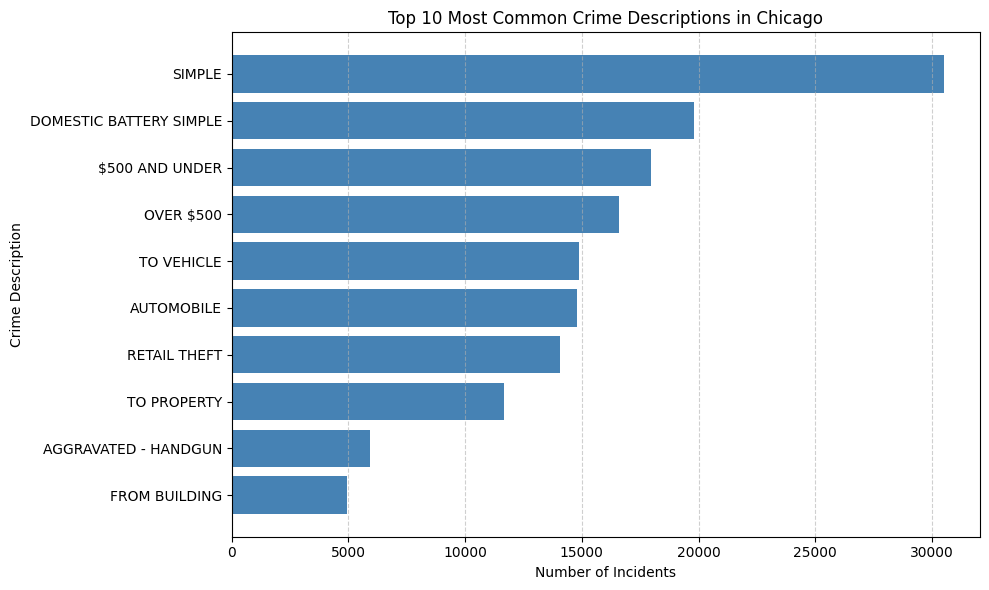

In [57]:
description_counts = cf['Description'].value_counts().head(10).reset_index()
description_counts.columns = ['Description', 'Number of Incidents']


plt.figure(figsize=(10,6))
plt.barh(description_counts['Description'], description_counts['Number of Incidents'], color='steelblue')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Description')
plt.title('Top 10 Most Common Crime Descriptions in Chicago')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()


<h3 style="color:gray">
    INSIGHT 31: With almost 30,000 occurrences, the "SIMPLE" category has the most incidences and is the most often reported crime in the dataset. Given how common small physical altercations are in a heavily populated metropolis like Chicago, this group probably includes non-aggravated assaults or battery.
</h3>


<h3 style="color:gray">
    INSIGHT 32: The fact that "DOMESTIC BATTERY SIMPLE" comes in second indicates that domestic violence has a significant role in the overall crime rate.
</h3>

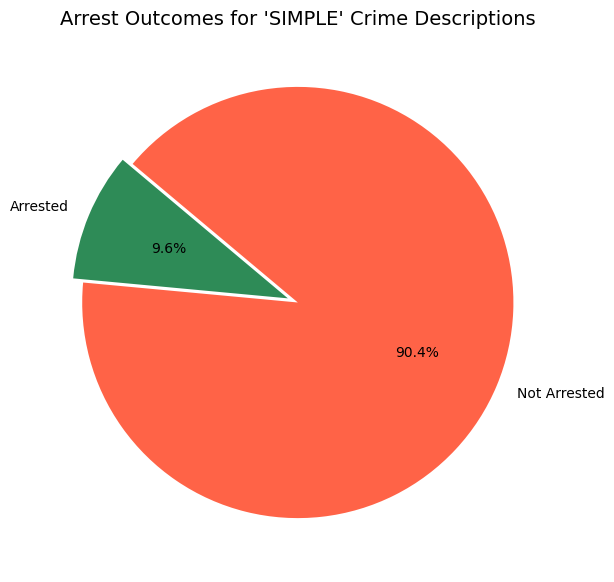

Number of 'SIMPLE' incidents resulting in arrests vs not:
Arrest
False    27585
True      2941
Name: count, dtype: int64




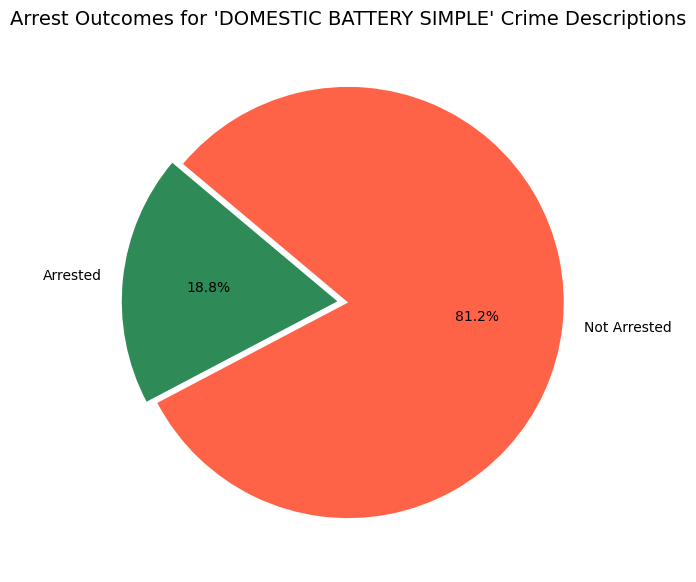

Number of 'DOMESTIC BATTERY SIMPLE' incidents resulting in arrests vs not:
Arrest
False    16082
True      3728
Name: count, dtype: int64


In [60]:

simple_cases = cf[cf['Description'] == "SIMPLE"]
arrest_counts_simple = simple_cases['Arrest'].value_counts()

labels = ['Arrested', 'Not Arrested']
sizes = [arrest_counts_simple[True], arrest_counts_simple[False]]
colors = ['#2E8B57', '#FF6347']

plt.figure(figsize=(7,7))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    colors=colors, explode=(0.05, 0)
)
plt.title("Arrest Outcomes for 'SIMPLE' Crime Descriptions", fontsize=14)
plt.show()

print("Number of 'SIMPLE' incidents resulting in arrests vs not:")
print(arrest_counts_simple)
print("\n" + "="*70 + "\n")

domestic_battery_simple = cf[cf['Description'] == "DOMESTIC BATTERY SIMPLE"]
arrest_counts_domestic = domestic_battery_simple['Arrest'].value_counts()

labels = ['Arrested', 'Not Arrested']
sizes = [arrest_counts_domestic[True], arrest_counts_domestic[False]]
colors = ['#2E8B57', '#FF6347']

plt.figure(figsize=(7,7))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    colors=colors, explode=(0.05, 0)
)
plt.title("Arrest Outcomes for 'DOMESTIC BATTERY SIMPLE' Crime Descriptions", fontsize=14)
plt.show()

print("Number of 'DOMESTIC BATTERY SIMPLE' incidents resulting in arrests vs not:")
print(arrest_counts_domestic)

<h3 style="color:gray">
    INSIGHT 33 - SIMPLE: Only around 9.6% of “SIMPLE” incidents led to an arrest, meaning that the majority of these minor offenses (about 90%) were unresolved, likely due to insufficient evidence or difficulty in identifying suspects.
</h3>

<h3 style="color:gray">
    INSIGHT 34 - COMPARED: “DOMESTIC BATTERY SIMPLE” cases have a noticeably higher arrest rate (18.8%) compared to “SIMPLE” cases (9.6%).
This indicates that domestic-related incidents are more likely to lead to an arrest, possibly because these situations often involve clear evidence or immediate risk to victims.
</h3>

<h3 style="color:gray">
    INSIGHT 35: Stronger law enforcement regulations and required arrest procedures for domestic violence, as opposed to general altercations, may potentially be the reason for the higher arrest rates for domestic cases. ON the other hand, SIMPLE” incidents (often minor assaults or disputes) might be resolved informally or lack sufficient grounds for detention.

</h3>

 <br> <hr>